In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df_hl = pd.read_csv('hailun.csv')
kinds = ['km','game','ice','label']
cols = ['km','game','ice']
label = ['label']
label_level = ['1','2','3']
df_hl = df_hl[kinds]#获取数据源，并设置一个子类集 cols方便后面只针对非目标特征进行数据归一化处理

df_hl = df_hl.replace(0,np.nan)
df_hl = df_hl.dropna(axis=0, how='any')
df_hl = df_hl.reset_index(drop = True)#对数据源去含0值行并对索引进行重新排序

df_hl[cols] = MinMaxScaler().fit_transform(df_hl[cols])#数据归一化

cols_train_hl, cols_test_hl, label_train_hl, label_test_hl = \
    train_test_split(df_hl[cols], df_hl[label], test_size = 0.1, random_state = 42)#分割训练集与测试集

In [7]:
from sklearn import tree
hl_tree = tree.DecisionTreeClassifier(max_depth = 3)
hl_tree.fit(cols_train_hl,label_train_hl)#训练决策树模型
print(hl_tree)
hl_tree.score(cols_test_hl, label_test_hl)#评测该模型得分

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


0.94680851063829785

In [3]:
dot_data = \
    tree.export_graphviz(
        hl_tree,
        out_file = None,
        feature_names = cols,
        class_names = label_level,
        filled = True,
        impurity = False,
        rounded = True
    )#构建决策树

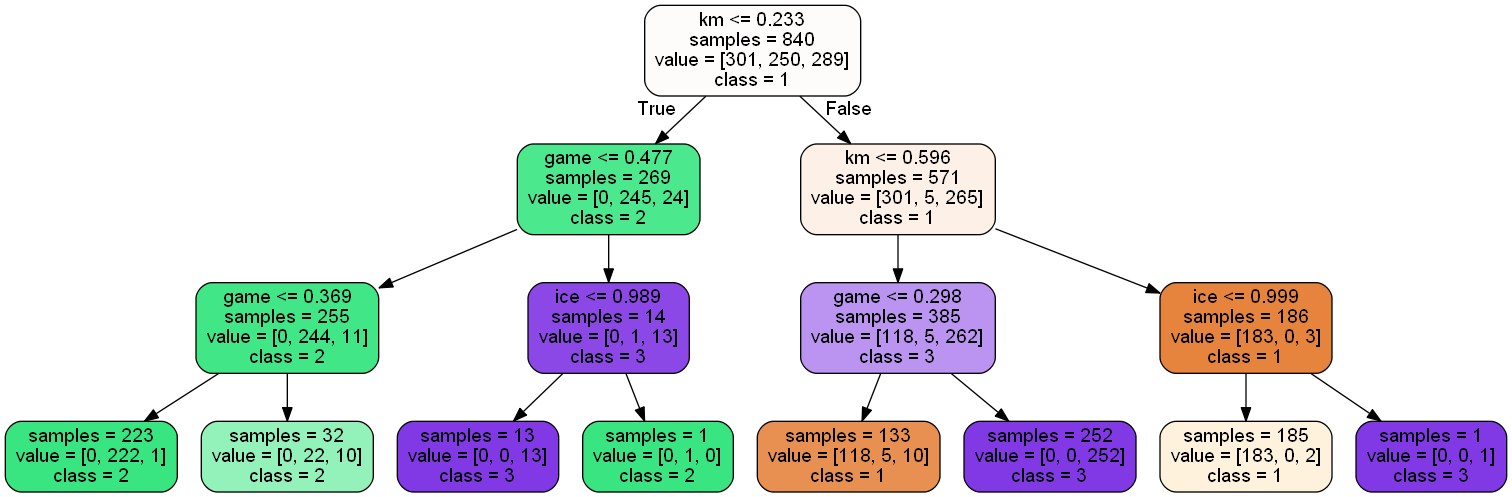

In [4]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[15].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png())#展示决策树

In [23]:
from sklearn.model_selection import cross_val_score

h1_tree_scross = cross_val_score(hl_tree,cols_train_hl,label_train_hl, scoring='accuracy',cv=10)
print(h1_tree_scross)#交叉验证

[ 0.87058824  0.89285714  0.97619048  0.97619048  0.98809524  0.95238095
  0.97619048  0.97619048  0.89285714  0.96385542]


In [24]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor( random_state = 42)
rfr.fit(cols_train_hl, label_train_hl)
rfr.score(cols_test_hl, label_test_hl)

X:\Study\robotstudy\Tools\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.80204833141541998

In [25]:
from sklearn.grid_search import GridSearchCV
tree_param_grid = { 'min_samples_split': list((3,6,9)),'n_estimators':list((10,50,100))}
grid = GridSearchCV(RandomForestRegressor(),param_grid=tree_param_grid, cv=5)
grid.fit(cols_train_hl, label_train_hl)
grid.grid_scores_, grid.best_params_, grid.best_score_

X:\Study\robotstudy\Tools\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
X:\Study\robotstudy\Tools\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
X:\Study\robotstudy\Tools\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit

X:\Study\robotstudy\Tools\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
X:\Study\robotstudy\Tools\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
X:\Study\robotstudy\Tools\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
X:\Study\robotstudy\Tools\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

([mean: 0.85559, std: 0.04389, params: {'min_samples_split': 3, 'n_estimators': 10},
  mean: 0.85373, std: 0.03605, params: {'min_samples_split': 3, 'n_estimators': 50},
  mean: 0.86062, std: 0.03343, params: {'min_samples_split': 3, 'n_estimators': 100},
  mean: 0.85059, std: 0.04185, params: {'min_samples_split': 6, 'n_estimators': 10},
  mean: 0.86158, std: 0.03232, params: {'min_samples_split': 6, 'n_estimators': 50},
  mean: 0.86099, std: 0.03652, params: {'min_samples_split': 6, 'n_estimators': 100},
  mean: 0.86287, std: 0.03918, params: {'min_samples_split': 9, 'n_estimators': 10},
  mean: 0.86906, std: 0.03119, params: {'min_samples_split': 9, 'n_estimators': 50},
  mean: 0.87211, std: 0.03535, params: {'min_samples_split': 9, 'n_estimators': 100}],
 {'min_samples_split': 9, 'n_estimators': 100},
 0.8721124404573602)